In [ ]:
import pandas as pd
from numpy import mean
from numpy import std
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, RepeatedStratifiedKFold
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded =  files.upload()

Saving KDD99_chi2_5.csv to KDD99_chi2_5.csv


In [ ]:
df = pd.read_csv('KDD99_chi2_5.csv')
df.head()

,duration,src_bytes,dst_bytes,count,srv_count,labels
0,0,181,5450,8,8,1
1,0,239,486,8,8,1
2,0,235,1337,8,8,1
3,0,219,1337,6,6,1
4,0,217,2032,6,6,1


In [ ]:
X = df.drop('labels', axis = 1)
y = df['labels']
X.shape, y.shape

((793486, 5), (793486,))

In [ ]:
# to devide the data set into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((555440, 5), (238046, 5), (555440,), (238046,))

## **classification / supervised learning**

Classification Models

In [ ]:
gnb = GaussianNB()

NB with TTS Method

In [ ]:
# to train the model
gnb.fit(X_train, y_train)

GaussianNB()

In [ ]:
# to test the model
y_pred = gnb.predict(X_test)

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.93


In [ ]:
# Calculate precision, recall, and F1-score separately
# use micro when we need overall performance results (collectively of all classes)
# use macro when we want performance results independtly by each class
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred,  average='macro')

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')

Precision: 0.94
Recall: 0.93
F1-score: 0.93


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.87      0.93    118746
           1       0.89      0.99      0.94    119300

    accuracy                           0.93    238046
   macro avg       0.94      0.93      0.93    238046
weighted avg       0.94      0.93      0.93    238046



In [ ]:
# Calculate and display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[103847  14899]
 [   953 118347]]


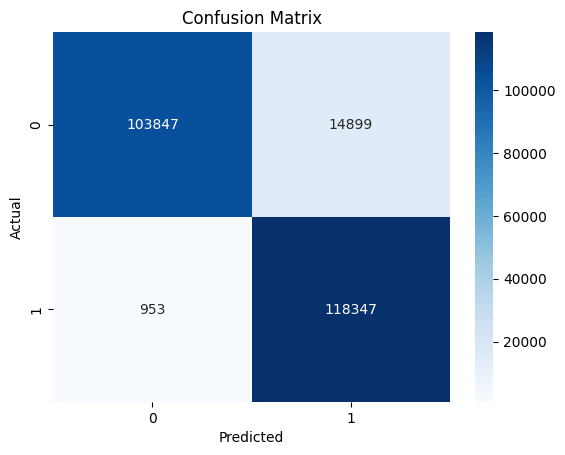

In [ ]:
# Create a heatmap for the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()